# **NOTE**

Refer to the changes made from the MNIST NB

# Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

(X_train,y_train), (X_test,y_test) = cifar10.load_data()

print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [3]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

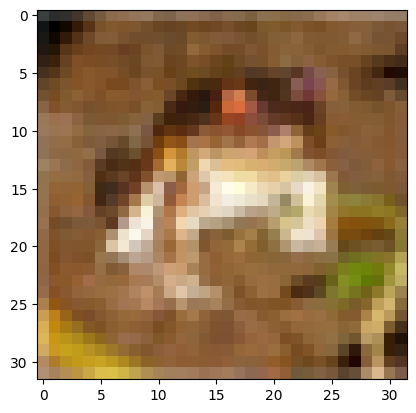

In [4]:
plt.imshow(X_train[0]);

# Normalise the Data

In [5]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [6]:
X_train = X_train/255
X_test = X_test/255

X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

# Convert Numerical/Cont. to Categorical

Convert y_test values to categorical values NOT Continuous as they are now

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((50000, 10), (10000, 10))

# Model Training

In [9]:
# MNIST Dataset Size
28*28 , 32*32*3

(784, 3072)

        So CIFAR-10 is much more complex than the MNIST Dataset, 

        SO we will also add a lot more Nuerons to the DENSE layer

        SO we will add another layer of CNN, Pool layer

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model = Sequential()

# CNN, Pool Layer
model.add(Conv2D(filters=32, kernel_size = (4,4), strides=(1,1), 
                 padding="valid", input_shape = (32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))

# CNN, Pool Layer
model.add(Conv2D(filters=32, kernel_size = (4,4), strides=(1,1), 
                 padding="valid", input_shape = (32,32,3), activation="relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))

# Output Layer: 10 Because we have 10 different classes of classification
# Softmax --> Multiclass Classification
model.add(Dense(10, activation="softmax"))

# Compile the model: 
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

# CallBacks

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = "val_accuracy", patience=2)

In [12]:
model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/30
1563/1563 [==============================] - 19s 8ms/step - loss: 1.5009 - accuracy: 0.4598 - val_loss: 1.2688 - val_accuracy: 0.5476
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1560 - accuracy: 0.5933 - val_loss: 1.1556 - val_accuracy: 0.5923
Epoch 3/30
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0120 - accuracy: 0.6440 - val_loss: 1.0294 - val_accuracy: 0.6371
Epoch 4/30
1563/1563 [==============================] - 16s 11ms/step - loss: 0.9090 - accuracy: 0.6804 - val_loss: 0.9648 - val_accuracy: 0.6685
Epoch 5/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8239 - accuracy: 0.7126 - val_loss: 1.0110 - val_accuracy: 0.6525
Epoch 6/30
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7432 - accuracy: 0.7405 - val_loss: 0.9968 - val_accuracy: 0.6590


# Evaluate

In [13]:
metrics = pd.DataFrame(model.history.history)
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [14]:
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.500941,0.45980,1.268802,0.5476
1,1.156026,0.59328,1.155615,0.5923
2,1.012015,0.64398,1.029382,0.6371
3,0.908959,0.68042,0.964823,0.6685
4,0.823934,0.71256,1.011042,0.6525
5,0.743158,0.74046,0.996786,0.6590


<Axes: >

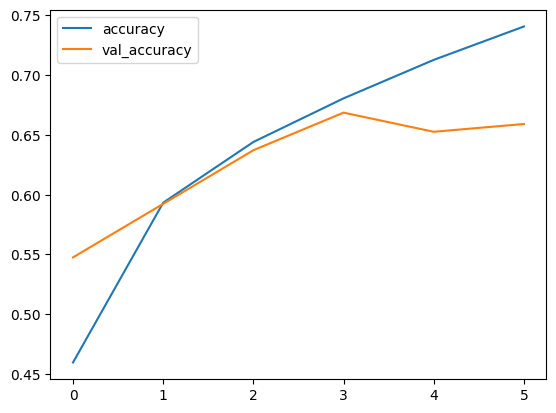

In [15]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

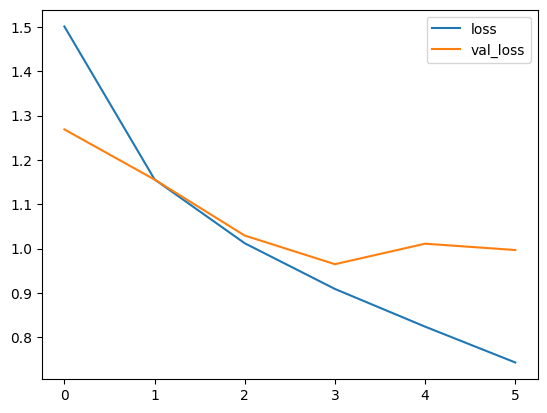

In [16]:
metrics[["loss" , "val_loss"]].plot()

In [17]:
model.evaluate(X_test, y_test,verbose=0)

[0.99678635597229, 0.6589999794960022]

In [19]:
from sklearn.metrics import classification_report,confusion_matrix
y_preds = model.predict(X_test)
print(y_test.shape, y_preds.shape)

# Convert one-hot encoded y_test back to the original format
y_test_labels = np.argmax(y_test, axis=1)
y_preds_labels = np.argmax(y_preds, axis=1)

print(y_test_labels.shape, y_preds_labels.shape)

print(classification_report(y_test_labels, y_preds_labels))

313/313 [==============================] - 1s 4ms/step
(10000, 10) (10000, 10)
(10000,) (10000,)
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1000
           1       0.83      0.76      0.79      1000
           2       0.52      0.61      0.56      1000
           3       0.43      0.56      0.49      1000
           4       0.70      0.44      0.54      1000
           5       0.55      0.52      0.54      1000
           6       0.66      0.80      0.72      1000
           7       0.82      0.62      0.70      1000
           8       0.76      0.82      0.79      1000
           9       0.71      0.78      0.74      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.66     10000
weighted avg       0.67      0.66      0.66     10000



In [20]:
print(confusion_matrix(y_test_labels, y_preds_labels))

[[669  31  68  30  20  10  19   8 102  43]
 [ 12 757   8  15   5   0  23   0  44 136]
 [ 58   5 611 101  24  69  80  18  14  20]
 [ 11  11  89 565  38 141  88  20  13  24]
 [ 26   1 152 129 436  65 121  46  18   6]
 [  9   5  92 263  21 523  40  29   7  11]
 [  4   7  55  76   7  26 804   6   9   6]
 [  9   6  63  84  65  89  21 620   8  35]
 [ 53  31  15  18   5   8   5   3 824  38]
 [ 28  63  12  28   4  12  17   9  46 781]]


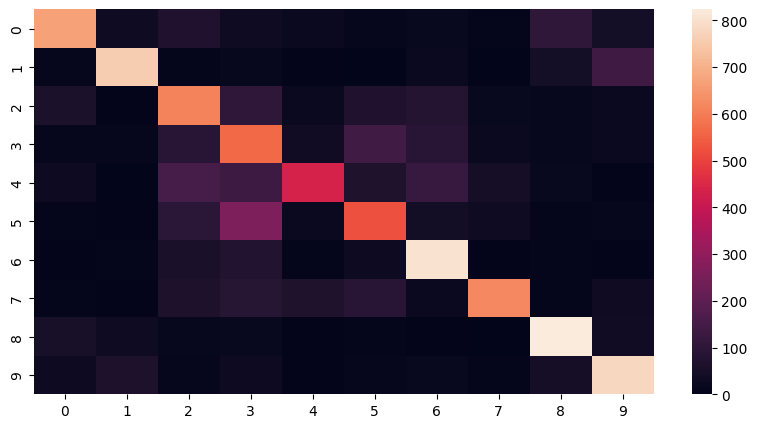

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test_labels, y_preds_labels));